<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Internet_fundus_image_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split')

['train', 'val', 'test']

In [4]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split/train'),

(['RE fundus', 'LE fundus'],)

In [5]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split/val'),os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split/test')

(['RE fundus', 'LE fundus'], ['RE fundus', 'LE fundus'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/train',
                                          target_size=(64,64),
                                          class_mode='binary')
valimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/val',
                                          target_size=(64,64),
                                          class_mode='binary')
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/test',
                                          target_size=(64,64),
                                          class_mode='binary')

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(32,(3,3), activation='relu',input_shape=(64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(32,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(64,activation='relu'),
                    Dense(1,activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [147]:
model.fit(trainimages,batch_size=32,epochs=3,validation_data=valimages)
model.save('internetfundus_images_model.keras')

Epoch 1/3
3/3 [==============================] - 3s 1s/step - loss: 6.1638e-04 - accuracy: 1.0000 - val_loss: 1.8638 - val_accuracy: 0.8000
Epoch 2/3
3/3 [==============================] - 3s 877ms/step - loss: 6.2007e-04 - accuracy: 1.0000 - val_loss: 1.8821 - val_accuracy: 0.8000
Epoch 3/3
3/3 [==============================] - 4s 1s/step - loss: 5.5105e-04 - accuracy: 1.0000 - val_loss: 1.9048 - val_accuracy: 0.8000


In [166]:
predictions=model.predict(testimages)

1/1 [==============================] - 0s 87ms/step


In [167]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [115]:
y_true=testimages.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
testimages.class_indices

{'LE fundus': 0, 'RE fundus': 1}

In [168]:
from sklearn import metrics
metrics.confusion_matrix(y_true,predictions)

array([[4, 1],
       [0, 5]])

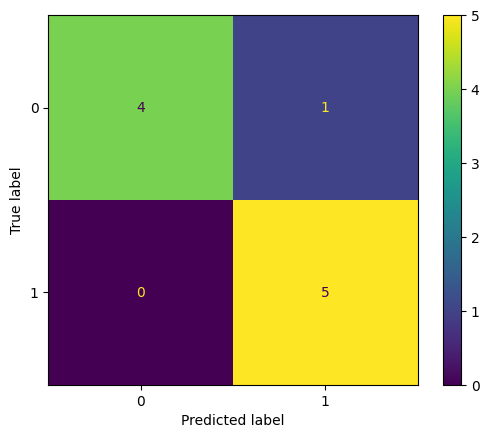

In [171]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,predictions)

In [172]:
print(metrics.classification_report(y_true,predictions,target_names=['left eye fundus','right eye fundus']))

                  precision    recall  f1-score   support

 left eye fundus       1.00      0.80      0.89         5
right eye fundus       0.83      1.00      0.91         5

        accuracy                           0.90        10
       macro avg       0.92      0.90      0.90        10
    weighted avg       0.92      0.90      0.90        10



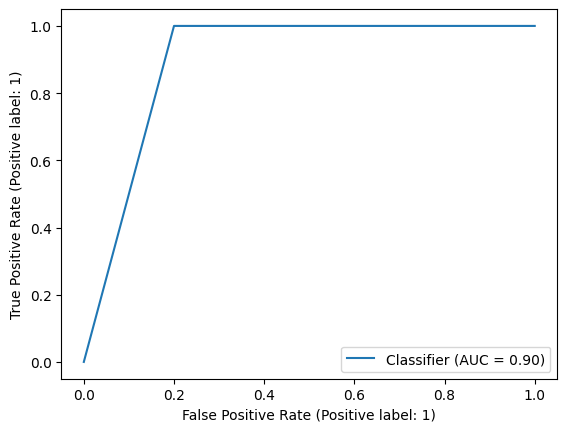

In [175]:
metrics.RocCurveDisplay.from_predictions(y_true,predictions)

1/1 [==============================] - 0s 79ms/step
Prediction: left eye fundus


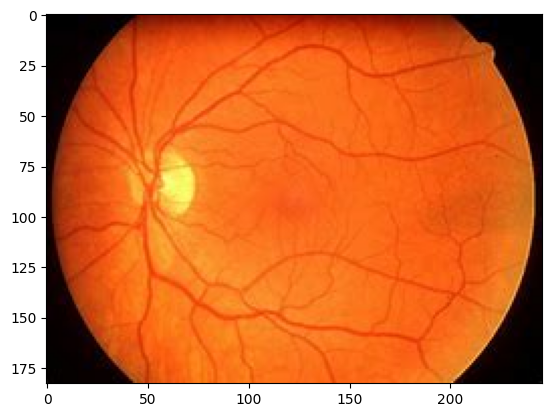

In [178]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/internetfundus_images_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "right eye fundus"  # Example class names, modify as per your binary classes
    else:
        return "left eye fundus"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Nornal internet findus photos/split/test/LE fundus/OIP (14).jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage= image.load_img('/content/drive/MyDrive/Nornal internet findus photos/split/test/LE fundus/OIP (14).jpg')
plt.imshow(testimage)

1/1 [==============================] - 0s 26ms/step
Prediction: right eye fundus


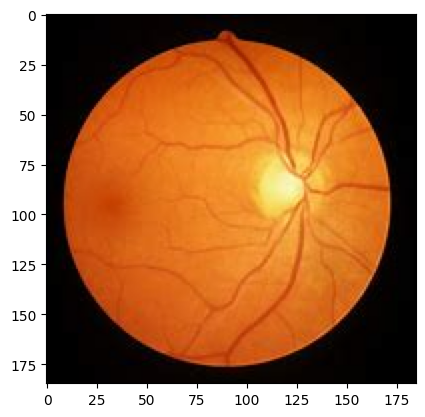

In [179]:
unknown_image_path = "/content/drive/MyDrive/Nornal internet findus photos/split/test/RE fundus/OIP (11)2.jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage= image.load_img('/content/drive/MyDrive/Nornal internet findus photos/split/test/RE fundus/OIP (11)2.jpg')
plt.imshow(testimage)